In [1]:
%matplotlib inline
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from scipy.special import erf
from scipy.stats import pearsonr, kendalltau, spearmanr
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


In [2]:
d1=pd.read_csv('aggtrx_20141001.csv')
d2=pd.read_csv('aggtrx_20141002.csv')
d3=pd.read_csv('aggtrx_20141003.csv')
d4=pd.read_csv('aggtrx_20141004.csv')
d5=pd.read_csv('aggtrx_20141005.csv')
d6=pd.read_csv('aggtrx_20141006.csv')
d7=pd.read_csv('aggtrx_20141007.csv')

In [ ]:
d=[d1,d2,d3,d4,d5,d5,d6,d7]
df=pd.concat(d, ignore_index=True)
df.info()

In [4]:
df_f1=df[df.TX_FRAUD==1]
df_f0=df[df.TX_FRAUD==0]

In [29]:
df_f0_s=df_f0.sample(7489)

In [30]:
df_sl=[df_f0_s,df_f1]
df_s=pd.concat(df_sl,ignore_index=True)

In [31]:
fr=df_s['TX_FRAUD'].apply(str)
age=df_s['AGE']
am=df_s['TX_AMOUNT']
ID=df_s['CARD_PAN_ID']
last=df_s['NB_TRX_LAST_24H']
time_s=df_s['TX_TIME_SECONDS']
new=[ID,am,age,fr,time_s,last]

In [32]:
w1=pd.concat([ID, am, age, fr, time_s, last], axis=1)
w1.to_csv("select/w1", index=False, header=True)

In [9]:
d8=pd.read_csv('aggtrx_20141008.csv')
d9=pd.read_csv('aggtrx_20141009.csv')
d10=pd.read_csv('aggtrx_20141010.csv')
d_t=[d8,d9,d10]
d_tt=pd.concat(d_t,ignore_index=True)
d_tt0=d_tt[d_tt.TX_FRAUD==0]
d_tt1=d_tt[d_tt.TX_FRAUD==1]
d_tt0s=d_tt0.sample(8000)
d_ttc=[d_tt1,d_tt0s]
te=pd.concat(d_ttc,ignore_index=True) #87 % of guess, answering always zero
test=pd.concat([te.CARD_PAN_ID,te.TX_AMOUNT,te.AGE,te.TX_FRAUD.apply(str),te.TX_TIME_SECONDS,te.NB_TRX_LAST_24H],axis=1)
test=test.sample(9109)
test.to_csv("select/test",index=False, header=True)
test1=pd.read_csv("select/test")

In [42]:
df_f0_s=df_f0.sample(7489)
df_sl=[df_f0_s,df_f1]
df_s=pd.concat(df_sl,ignore_index=True)
fr=df_s['TX_FRAUD'].apply(str)
age=df_s['AGE']
am=df_s['TX_AMOUNT']
ID=df_s['CARD_PAN_ID']
last=df_s['NB_TRX_LAST_24H']
time_s=df_s['TX_TIME_SECONDS']
new=[ID,am,age,fr,time_s,last]
w2=pd.concat([ID, am, age, fr, time_s, last], axis=1)
w2.to_csv("select/w2", index=False, header=True)
df_f0_s=df_f0.sample(7489)
df_sl=[df_f0_s,df_f1]
df_s=pd.concat(df_sl,ignore_index=True)
fr=df_s['TX_FRAUD'].apply(str)
age=df_s['AGE']
am=df_s['TX_AMOUNT']
ID=df_s['CARD_PAN_ID']
last=df_s['NB_TRX_LAST_24H']
time_s=df_s['TX_TIME_SECONDS']
new=[ID,am,age,fr,time_s,last]
w3=pd.concat([ID, am, age, fr, time_s, last], axis=1)
w3.to_csv("select/w3", index=False, header=True)

In [10]:
 import h2o

In [40]:
h2o.init(port=54331)


Checking whether there is an H2O instance running at http://localhost:54331..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_111"; Java(TM) SE Runtime Environment (build 1.8.0_111-b14); Java HotSpot(TM) 64-Bit Server VM (build 25.111-b14, mixed mode)
  Starting server from /etc/anaconda3/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpylslidpx
  JVM stdout: /tmp/tmpylslidpx/h2o_skurchab_started_from_python.out
  JVM stderr: /tmp/tmpylslidpx/h2o_skurchab_started_from_python.err
  Server is running at http://127.0.0.1:54331
Connecting to H2O server at http://127.0.0.1:54331... successful.


H2O cluster uptime:,01 secs
H2O cluster version:,3.10.5.2
H2O cluster version age:,15 days
H2O cluster name:,H2O_from_python_skurchab_9hoqdp
H2O cluster total nodes:,1
H2O cluster free memory:,6.962 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54331
H2O connection proxy:,None


In [39]:
h2o.cluster().shutdown()

H2O session _sid_a579 closed.


In [12]:
col_names=['card_pan_id','tx_amount','age','tx_time_seconds','nb_tx_last_24h']
response_col=''

In [43]:
df_train = h2o.import_file("select/w1")
df_train2=h2o.import_file("select/w2")
df_train3=h2o.import_file("select/w3")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [44]:
df_val=h2o.import_file("select/test")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [45]:
train_col=['CARD_PAN_ID','TX_AMOUNT','AGE','TX_TIME_SECONDS','NB_TRX_LAST_24H']
resp_col='TX_FRAUD'
type('TX_FRAUD')

str

In [46]:
model = H2ORandomForestEstimator(ntrees=10, max_depth=20, nfolds=10, binomial_double_trees=True, stopping_metric= "auc")
model2 = H2ORandomForestEstimator(ntrees=10, max_depth=20, nfolds=10, binomial_double_trees=True, stopping_metric= "auc")
model3 = H2ORandomForestEstimator(ntrees=10, max_depth=20, nfolds=10, binomial_double_trees=True, stopping_metric= "auc")
model.train(x=train_col, y=resp_col, training_frame=df_train)
model2.train(x=train_col, y=resp_col, training_frame=df_train2)
model3.train(x=train_col, y=resp_col, training_frame=df_train3)
pred=model.predict(df_val)
pred2=model2.predict(df_val)
pred3=model3.predict(df_val)

drf Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
pr=h2o.h2o.as_list(pred, use_pandas=True)
pr2=h2o.h2o.as_list(pred2,use_pandas=True)
pr3=h2o.h2o.as_list(pred3,use_pandas=True)
(pr+pr2+pr3)/3

In [17]:
train_col=['CARD_PAN_ID','TX_AMOUNT','AGE','TX_TIME_SECONDS','NB_TRX_LAST_24H']
resp_col='TX_FRAUD'
type('TX_FRAUD')

str

In [15]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
model = H2ORandomForestEstimator(ntrees=50, max_depth=20, nfolds=10, binomial_double_trees=True, stopping_metric= "auc")

In [19]:
model.train(x=train_col, y=resp_col, training_frame=df_train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [20]:
pred=model.predict(df_val)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
pr=h2o.h2o.as_list(pred, use_pandas=True)
pr.info()
tr=h2o.h2o.as_list(df_val, use_pandas=True)
tr.info()

In [23]:
# sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
false_positive_rate, true_positive_rate, thresholds = roc_curve(tr.TX_FRAUD,pr.predict,pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)

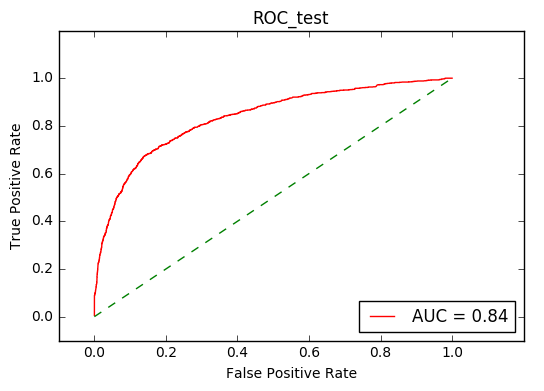

In [24]:
plt.title('ROC_test')
plt.plot(false_positive_rate, true_positive_rate, 'r',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
#Something wrong! See later again

In [ ]:
n=[tr.CARD_PAN_ID,pr.predict]
new=pd.concat(n,axis=1)
gr=new.groupby("CARD_PAN_ID").max()
largest=gr.predict.nlargest(100) # 100 cards with highest probability of being fraud
largest


In [3]:
sales = [{'account': 'Jones LLC', 'Jan': 150, 'Feb': 200, 'Mar': 140},
         {'account': 'Alpha Co',  'Jan': 200, 'Feb': 210, 'Mar': 215},
         {'account': 'Blue Inc',  'Jan': 50,  'Feb': 90,  'Mar': 95 },
         {'account': 'Jones LLC', 'Jan': 120, 'Feb': 220, 'Mar': 240},
         {'account': 'Blue Inc',  'Jan': 60,  'Feb': 80,  'Mar': 105 }]
frame = pd.DataFrame(sales)
frame

,Feb,Jan,Mar,account
0,200,150,140,Jones LLC
1,210,200,215,Alpha Co
2,90,50,95,Blue Inc
3,220,120,240,Jones LLC
4,80,60,105,Blue Inc


In [26]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


In [27]:
#sklearn.metrics.precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)
precision, recall, thresholds=precision_recall_curve(tr.TX_FRAUD,pr.predict,pos_label=1)
#sklearn.metrics.average_precision_score(y_true, y_score, average='macro', sample_weight=None)
average_precision=average_precision_score(tr.TX_FRAUD, pr.predict) 

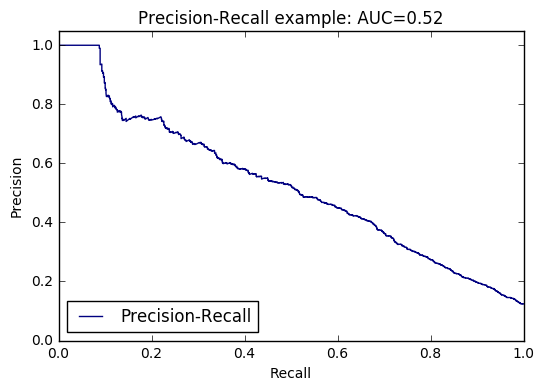

In [28]:
from sklearn.multiclass import OneVsRestClassifier
plt.clf()
plt.plot(recall, precision, color='navy',
         label='Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()
